In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.layers import * 
from tensorflow.keras.models import * 
import tensorflow.keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import glob 

In [3]:
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
import glob

# Root directory where the dataset is located
root_dir = r"C:\\Users\\joane\\OneDrive\\Desktop\\Sem 3\\DS\\Special Topic\\Dataset_BUSI_with_GT\\"

# Load benign class files
class1_files = glob.glob(os.path.join(root_dir, 'benign', '*'))
class1_files = [path for path in class1_files if 'mask' not in path]  # Filter out files with 'mask'
df1 = pd.DataFrame({'path': class1_files, 'class': 'benign'})

# Load malignant class files
class2_files = glob.glob(os.path.join(root_dir, 'malignant', '*'))
class2_files = [path for path in class2_files if 'mask' not in path]  # Filter out files with 'mask'
df2 = pd.DataFrame({'path': class2_files, 'class': 'malignant'})

# Load normal class files
class3_files = glob.glob(os.path.join(root_dir, 'normal', '*'))
class3_files = [path for path in class3_files if 'mask' not in path]  # Filter out files with 'mask'
df3 = pd.DataFrame({'path': class3_files, 'class': 'normal'})

# Check if files were found in each category
print("Benign files:", len(class1_files))
print("Malignant files:", len(class2_files))
print("Normal files:", len(class3_files))


Benign files: 437
Malignant files: 210
Normal files: 133


In [4]:
df = pd.concat([df1,df2,df3],axis=0)
df.shape

(780, 2)

In [5]:
df.head()

,path,class
0,C:\\Users\\joane\\OneDrive\\Desktop\\Sem 3\\DS...,benign
1,C:\\Users\\joane\\OneDrive\\Desktop\\Sem 3\\DS...,benign
2,C:\\Users\\joane\\OneDrive\\Desktop\\Sem 3\\DS...,benign
3,C:\\Users\\joane\\OneDrive\\Desktop\\Sem 3\\DS...,benign
4,C:\\Users\\joane\\OneDrive\\Desktop\\Sem 3\\DS...,benign


In [6]:
df = df.sample(frac=1.0)

In [7]:
df.shape[0] * 20 //100 

156

In [8]:
df_train = df.iloc[:int(df.shape[0]*0.7)]
df_test = df.iloc[int(df.shape[0]*0.7):int(df.shape[0]*0.85)]
df_valid = df.iloc[int(df.shape[0]*0.85):]

In [9]:
df_train.shape

(546, 2)

In [10]:
df_test.shape

(117, 2)

In [11]:
df_valid.shape

(117, 2)

In [12]:
datagen =ImageDataGenerator(rescale=1/255)
train =datagen.flow_from_dataframe(dataframe=df_train,
x_col="path",
y_col="class",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224)) 

test = datagen.flow_from_dataframe(dataframe=df_test,
x_col="path",
y_col="class",
batch_size=1,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

valid = datagen.flow_from_dataframe(dataframe=df_valid,
x_col="path",
y_col="class",
batch_size=1,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

Found 546 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.


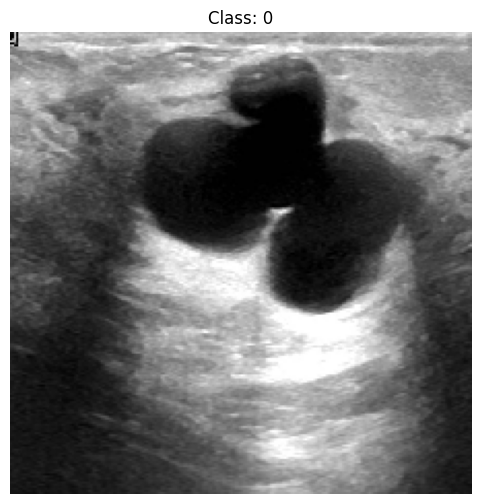

In [13]:
import matplotlib.pyplot as plt
images, labels = next(train)


plt.figure(figsize=(6, 6))
plt.imshow(images[0])
plt.title(f'Class: {np.argmax(labels[0])}') 
plt.axis('off')
plt.show()

In [14]:
VGG_model = Sequential()

pretrained_model= tensorflow.keras.applications.VGG19(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=3,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(3, activation='softmax'))
pretrained_model.trainable=False


In [15]:
VGG_model.compile(optimizer=tensorflow.keras.optimizers.Adam(0.0001),
              loss=tensorflow.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [16]:
#history = VGG_model.fit(train,epochs=100,validation_data=test)the accuracy will gradually incerase the higher the epoches are 

history = VGG_model.fit(train,epochs=5,validation_data=test)

Epoch 1/5


C:\Users\joane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.3559 - loss: 1.6262 - val_accuracy: 0.3590 - val_loss: 1.0286
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.4328 - loss: 1.3038 - val_accuracy: 0.6325 - val_loss: 0.9010
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.5001 - loss: 1.1446 - val_accuracy: 0.6581 - val_loss: 0.8529
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.5395 - loss: 1.0641 - val_accuracy: 0.6752 - val_loss: 0.8345
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.5498 - loss: 1.0380 - val_accuracy: 0.6581 - val_loss: 0.8139


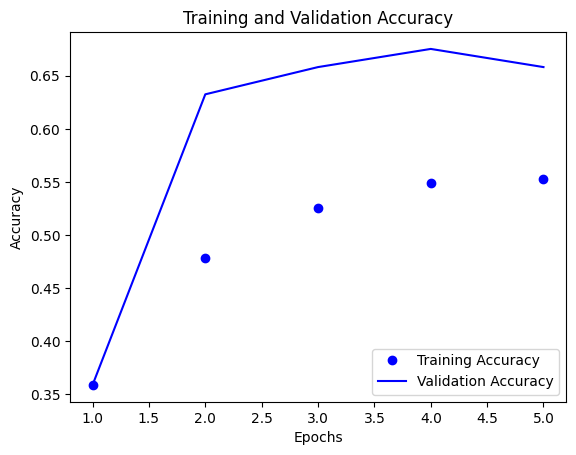

In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
VGG_model.save(r'C:\Users\joane\OneDrive\Desktop\Sem 3\DS\Special Topic\Model.keras')

In [19]:
def evaluate(model, eval_generator):
    random_index = random.randint(0, len(eval_generator) - 1)
    image, label = eval_generator[random_index]
    output = model.predict(image)
    true_label = np.argmax(label[0])
    predicted_label = np.argmax(output[0])
    print('True label: {}'.format(true_label))
    print('Predicted label: {}'.format(predicted_label))
    plt.figure(figsize=(6, 6))
    plt.imshow(image[0])
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
True label: 2
Predicted label: 0


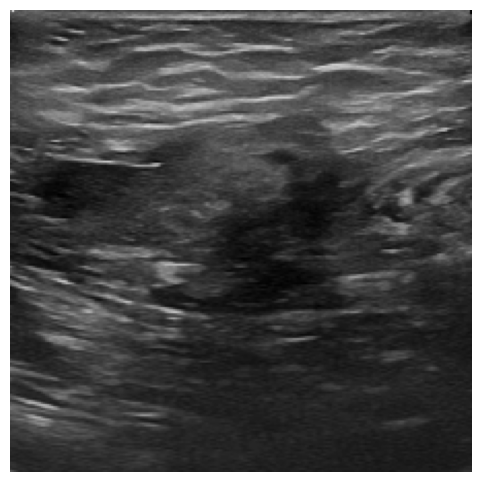

In [25]:
evaluate(VGG_model, valid)